In [1]:
# Necessary imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Data
data = pd.read_excel("C:/Users/srian/Documents/GitHub/Generative-AI-project/Centrifugal_pumps_measurements.xlsx")

data

,Machine_ID,value_ISO,value_DEMO,value_ACC,value_P2P,valueTEMP,minute,second,year,month,day,hour,Pump_Status
0,1,0.349609,0.000343,0.012512,0.042480,24.25,33,41,2022,12,7,12,Healthy
1,1,0.349609,0.000343,0.012512,0.042480,24.25,33,46,2022,12,7,12,Healthy
2,1,0.349609,0.000343,0.012512,0.042480,24.25,33,51,2022,12,7,12,Healthy
3,1,0.349609,0.000343,0.012512,0.042480,24.25,33,56,2022,12,7,12,Healthy
4,1,0.349609,0.000343,0.012512,0.042480,24.25,34,1,2022,12,7,12,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,2,0.023193,0.000277,0.000637,0.006409,23.00,11,47,2022,12,14,15,Not Healthy
5110,2,0.023193,0.000277,0.000637,0.006409,23.00,11,52,2022,12,14,15,Not Healthy
5111,2,0.023193,0.000277,0.000637,0.006409,23.00,11,57,2022,12,14,15,Not Healthy
5112,2,0.023193,0.000277,0.000637,0.006409,23.00,12,2,2022,12,14,15,Not Healthy


In [9]:
# Check for missing values
missing = data.isnull().sum()

# Check for duplicates
duplicates = data.duplicated().sum()

print("missing:", missing)
print("\nduplicates:", duplicates)

missing: Machine_ID     0
value_ISO      0
value_DEMO     0
value_ACC      0
value_P2P      0
valueTEMP      0
minute         0
second         0
year           0
month          0
day            0
hour           0
Pump_Status    0
dtype: int64

duplicates: 0


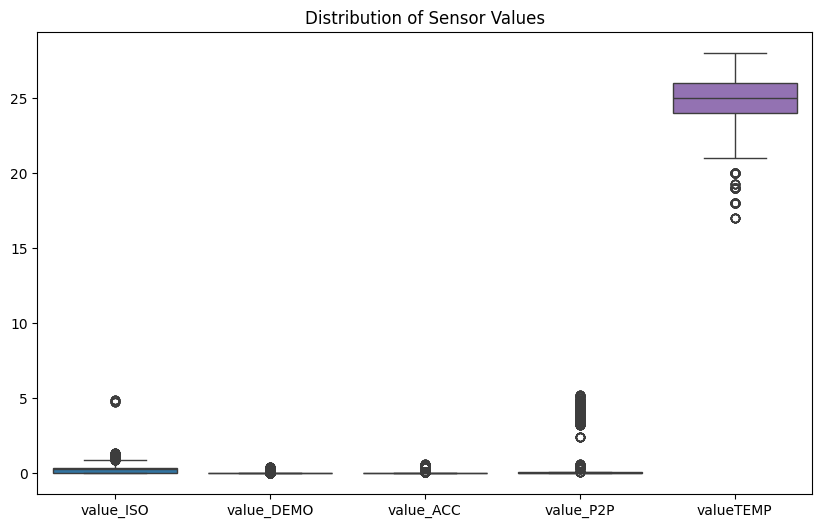

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sensor value distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['value_ISO', 'value_DEMO', 'value_ACC', 'value_P2P', 'valueTEMP']])
plt.title("Distribution of Sensor Values")
plt.show()

In [6]:
from scipy.stats import ttest_ind

# List to store results
results = []

# Loop through relevant columns (excluding Pump_Status and datetime)
for column in ['value_ISO', 'value_DEMO', 'value_ACC', 'value_P2P', 'valueTEMP']:
    healthy_values = data[data['Pump_Status'] == 'Healthy'][column]
    not_healthy_values = data[data['Pump_Status'] == 'Not Healthy'][column]
    
    # Perform t-test
    t_stat, p_val = ttest_ind(healthy_values, not_healthy_values, nan_policy='omit')
    
    # Append results
    results.append((column, t_stat, p_val))

# Display results
for column, t_stat, p_val in results:
    print(f"Column: {column}, T-statistic: {t_stat}, P-value: {p_val}")

Column: value_ISO, T-statistic: -8.848145050268652, P-value: 1.2063350293802398e-18
Column: value_DEMO, T-statistic: -20.067736565441507, P-value: 2.7556981584791757e-86
Column: value_ACC, T-statistic: -19.268535905507818, P-value: 6.349282481018826e-80
Column: value_P2P, T-statistic: -19.627500719421416, P-value: 9.38228818424016e-83
Column: valueTEMP, T-statistic: 19.959970770233102, P-value: 2.0465223303819237e-85
